In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Read two csv from john hopkin's and merge into df

In [112]:
usa = pd.read_csv("data/US_2020-05-06.csv") 
display(usa.info())
usa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
country          72 non-null object
date             72 non-null object
confirmed        72 non-null int64
deaths           72 non-null int64
new_confirmed    72 non-null int64
new_deaths       72 non-null int64
tagged_day       72 non-null int64
dtypes: int64(5), object(2)
memory usage: 4.1+ KB


None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day
0,US,2/24/20,51,0,36,0,1
1,US,2/25/20,51,0,0,0,2
2,US,2/26/20,57,0,6,0,3
3,US,2/27/20,58,0,1,0,4
4,US,2/28/20,60,0,2,0,5


In [113]:
kor = pd.read_csv("data/SouthKorea_2020-05-06.csv") 
display(kor.info())
kor.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
country          90 non-null object
date             90 non-null object
confirmed        90 non-null int64
deaths           90 non-null int64
new_confirmed    90 non-null int64
new_deaths       90 non-null int64
tagged_day       90 non-null int64
dtypes: int64(5), object(2)
memory usage: 5.0+ KB


None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day
0,"Korea, South",2/6/20,23,0,4,0,1
1,"Korea, South",2/7/20,24,0,1,0,2
2,"Korea, South",2/8/20,24,0,0,0,3
3,"Korea, South",2/9/20,25,0,1,0,4
4,"Korea, South",2/10/20,27,0,2,0,5


In [114]:
# joining on vertical stacks (axi s0 for addition to rows) for df's of kor & usa
df = pd.concat([usa, kor], axis=0)
display(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 89
Data columns (total 7 columns):
country          162 non-null object
date             162 non-null object
confirmed        162 non-null int64
deaths           162 non-null int64
new_confirmed    162 non-null int64
new_deaths       162 non-null int64
tagged_day       162 non-null int64
dtypes: int64(5), object(2)
memory usage: 10.1+ KB


None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day
0,US,2/24/20,51,0,36,0,1
1,US,2/25/20,51,0,0,0,2
2,US,2/26/20,57,0,6,0,3
3,US,2/27/20,58,0,1,0,4
4,US,2/28/20,60,0,2,0,5
...,...,...,...,...,...,...,...
85,"Korea, South",5/1/20,10780,250,6,2,86
86,"Korea, South",5/2/20,10793,250,13,0,87
87,"Korea, South",5/3/20,10801,252,8,2,88
88,"Korea, South",5/4/20,10804,254,3,2,89


In [115]:
# change date to type datetime
df['date'] = pd.to_datetime(df.date)
display(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 89
Data columns (total 7 columns):
country          162 non-null object
date             162 non-null datetime64[ns]
confirmed        162 non-null int64
deaths           162 non-null int64
new_confirmed    162 non-null int64
new_deaths       162 non-null int64
tagged_day       162 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 10.1+ KB


None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day
0,US,2020-02-24,51,0,36,0,1
1,US,2020-02-25,51,0,0,0,2
2,US,2020-02-26,57,0,6,0,3
3,US,2020-02-27,58,0,1,0,4
4,US,2020-02-28,60,0,2,0,5
...,...,...,...,...,...,...,...
85,"Korea, South",2020-05-01,10780,250,6,2,86
86,"Korea, South",2020-05-02,10793,250,13,0,87
87,"Korea, South",2020-05-03,10801,252,8,2,88
88,"Korea, South",2020-05-04,10804,254,3,2,89


#### add country code column to df

In [116]:
def country_code(row):
    if row['country'] == 'US':
        return 'USA'
    if row['country'] == 'Korea, South':
        return 'KOR'

In [117]:
df.apply(lambda row: country_code(row), axis=1)

0     USA
1     USA
2     USA
3     USA
4     USA
     ... 
85    KOR
86    KOR
87    KOR
88    KOR
89    KOR
Length: 162, dtype: object

In [118]:
df['country code'] = df.apply(lambda row: country_code(row), axis=1)
df

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day,country code
0,US,2020-02-24,51,0,36,0,1,USA
1,US,2020-02-25,51,0,0,0,2,USA
2,US,2020-02-26,57,0,6,0,3,USA
3,US,2020-02-27,58,0,1,0,4,USA
4,US,2020-02-28,60,0,2,0,5,USA
...,...,...,...,...,...,...,...,...
85,"Korea, South",2020-05-01,10780,250,6,2,86,KOR
86,"Korea, South",2020-05-02,10793,250,13,0,87,KOR
87,"Korea, South",2020-05-03,10801,252,8,2,88,KOR
88,"Korea, South",2020-05-04,10804,254,3,2,89,KOR


## Read owa testing df

In [119]:
testing = pd.read_csv("data/covid-19-tests-deaths-scatter-with-comparisons_2020May07.csv")
display(testing.info())
testing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437 entries, 0 to 9436
Data columns (total 5 columns):
Entity                                                                            9437 non-null object
Code                                                                              8737 non-null object
Date                                                                              9437 non-null object
Total tests per million people                                                    4216 non-null float64
Total confirmed deaths due to COVID-19 per million people (deaths per million)    8223 non-null float64
dtypes: float64(2), object(3)
memory usage: 368.8+ KB


None

,Entity,Code,Date,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
0,Afghanistan,AFG,24-Mar-20,NaN,0.026
1,Afghanistan,AFG,25-Mar-20,NaN,0.026
2,Afghanistan,AFG,26-Mar-20,NaN,0.026
3,Afghanistan,AFG,27-Mar-20,NaN,0.026
4,Afghanistan,AFG,28-Mar-20,NaN,0.051


In [120]:
# change date to type datetime
testing['Date'] = pd.to_datetime(testing.Date)
display(testing.info())
testing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437 entries, 0 to 9436
Data columns (total 5 columns):
Entity                                                                            9437 non-null object
Code                                                                              8737 non-null object
Date                                                                              9437 non-null datetime64[ns]
Total tests per million people                                                    4216 non-null float64
Total confirmed deaths due to COVID-19 per million people (deaths per million)    8223 non-null float64
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 368.8+ KB


None

,Entity,Code,Date,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
0,Afghanistan,AFG,2020-03-24,NaN,0.026
1,Afghanistan,AFG,2020-03-25,NaN,0.026
2,Afghanistan,AFG,2020-03-26,NaN,0.026
3,Afghanistan,AFG,2020-03-27,NaN,0.026
4,Afghanistan,AFG,2020-03-28,NaN,0.051


## Joining 3 df's into one

In [121]:
# left_on = df['']

In [122]:
df2 = pd.merge(left=df, right=testing, how='left', left_on=['date','country code'], right_on=['Date', 'Code'])
display(df2.info())
df2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 13 columns):
country                                                                           162 non-null object
date                                                                              162 non-null datetime64[ns]
confirmed                                                                         162 non-null int64
deaths                                                                            162 non-null int64
new_confirmed                                                                     162 non-null int64
new_deaths                                                                        162 non-null int64
tagged_day                                                                        162 non-null int64
country code                                                                      162 non-null object
Entity                                                                      

None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day,country code,Entity,Code,Date,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
0,US,2020-02-24,51,0,36,0,1,USA,NaN,NaN,NaT,NaN,NaN
1,US,2020-02-25,51,0,0,0,2,USA,NaN,NaN,NaT,NaN,NaN
2,US,2020-02-26,57,0,6,0,3,USA,NaN,NaN,NaT,NaN,NaN
3,US,2020-02-27,58,0,1,0,4,USA,NaN,NaN,NaT,NaN,NaN
4,US,2020-02-28,60,0,2,0,5,USA,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,"Korea, South",2020-05-01,10780,250,6,2,86,KOR,South Korea,KOR,2020-05-01,12153.0,4.837
158,"Korea, South",2020-05-02,10793,250,13,0,87,KOR,South Korea,KOR,2020-05-02,12241.0,4.876
159,"Korea, South",2020-05-03,10801,252,8,2,88,KOR,South Korea,KOR,2020-05-03,12307.0,4.876
160,"Korea, South",2020-05-04,10804,254,3,2,89,KOR,South Korea,KOR,2020-05-04,12365.0,4.915


In [123]:
df3 = df2.copy(deep=True)

# needed cols: 'country code','date','tagged_day','Total tests per million people','confirmed','deaths','new_confirmed','new_deaths', 
#                    'Total confirmed deaths due to COVID-19 per million people (deaths per million)'

df3_dropped_cols = ['country', 'Entity', 'Code', 'Date']
df3 = df3.drop(labels=df3_dropped_cols, axis=1)
df3

,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day,country code,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
0,2020-02-24,51,0,36,0,1,USA,NaN,NaN
1,2020-02-25,51,0,0,0,2,USA,NaN,NaN
2,2020-02-26,57,0,6,0,3,USA,NaN,NaN
3,2020-02-27,58,0,1,0,4,USA,NaN,NaN
4,2020-02-28,60,0,2,0,5,USA,NaN,NaN
...,...,...,...,...,...,...,...,...,...
157,2020-05-01,10780,250,6,2,86,KOR,12153.0,4.837
158,2020-05-02,10793,250,13,0,87,KOR,12241.0,4.876
159,2020-05-03,10801,252,8,2,88,KOR,12307.0,4.876
160,2020-05-04,10804,254,3,2,89,KOR,12365.0,4.915


In [124]:
df3.to_csv("df3.out.csv", index= False)

# Creating two subsets for each country USA & Korea

In [125]:
dfkor = df3.iloc[72:]
dfusa = df3.iloc[:72]

# Korea Plots

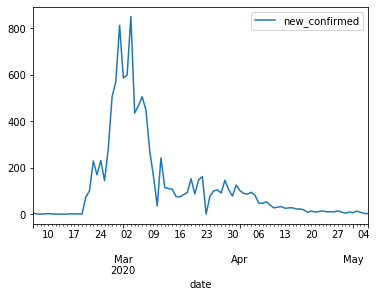

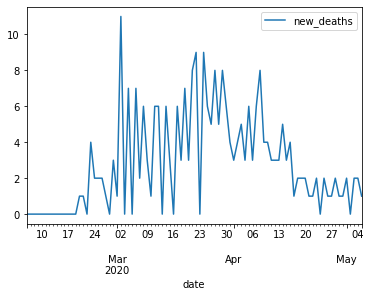

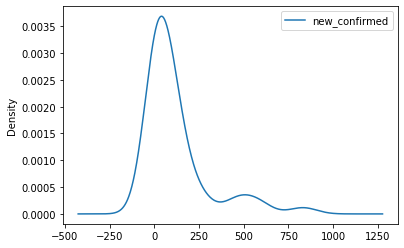

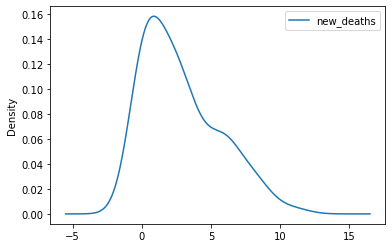

In [71]:
#dfkor.plot(x='tagged_day', y='new_confirmed') 
dfkor.plot(x='date', y='new_confirmed' ) # Look better with day I think - We can change if needed  
dfkor.plot(x='date', y='new_deaths', color = 'red')

dfkor.plot(x='date', y='new_confirmed', kind= 'kde')
dfkor.plot(x='date', y='new_deaths', kind= 'kde', color = 'red')


# USA plots

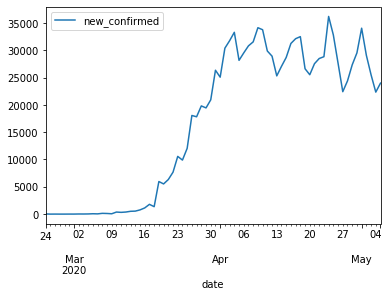

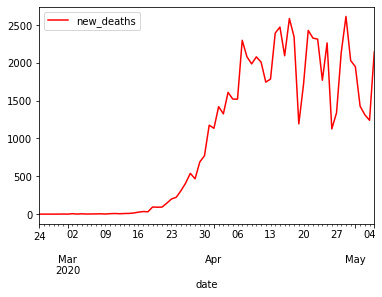

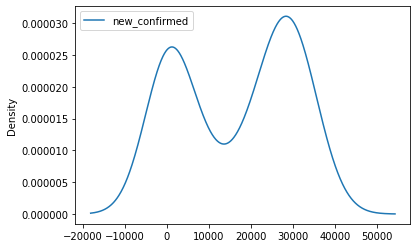

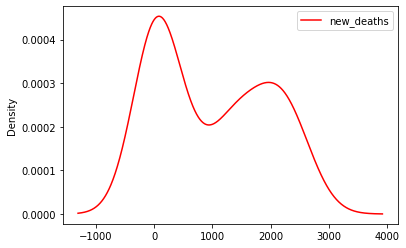

In [72]:
#dfusa.plot(x='tagged_day', y='new_confirmed') 
dfusa.plot(x='date', y='new_confirmed') # This one looks alot better 
dfusa.plot(x='date', y='new_deaths', color = 'red')

dfusa.plot(x='date', y='new_confirmed', kind= 'kde')
dfusa.plot(x='date', y='new_deaths', color = 'red',kind= 'kde')


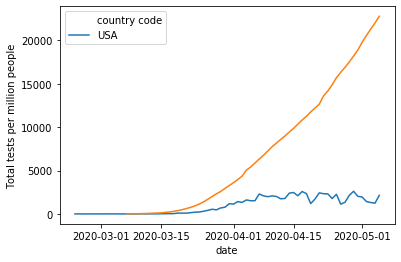

In [109]:
#line plot with both testing per million and new deaths in one - not sure about it 
#(orange = testing)
sns.lineplot(x='date', y='new_deaths', data = dfusa, hue='country code')
sns.lineplot(x='date',y='Total tests per million people', data = dfusa)

# USA and Korea Plots

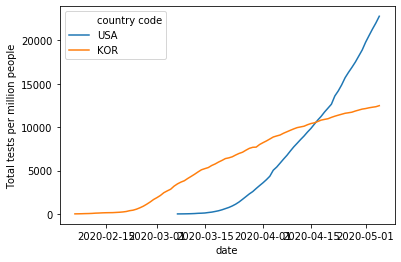

In [100]:
sns.lineplot(x='date', y='Total tests per million people', data = df3, hue='country code')


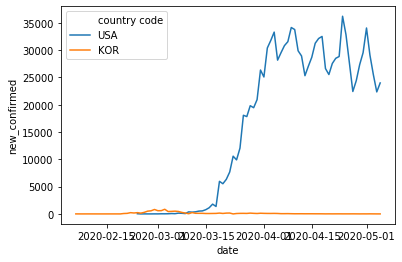

In [99]:
sns.lineplot(x='date', y='new_confirmed', data = df3, hue='country code')

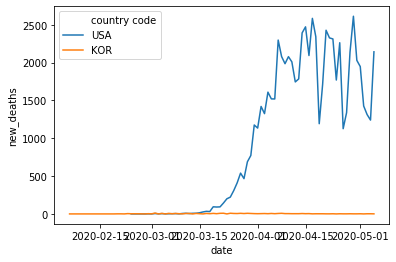

In [101]:
sns.lineplot(x='date', y='new_deaths', data = df3, hue='country code')

# SVM Korea

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
# dropping new_deaths and using deaths(cumulative) as repsonse variable
# dropping new_confirmed, since using cumulative values for confirmed cases & deaths
# dropping total confirmed deaths pe rmillion, directly correlated with deaths
# country code, since df contains all values of same country
# removing date, since tagged_day is added 
# using deaths as response variable Y
X_col_dropped = ['date','deaths','new_confirmed', 'new_deaths', 'country code',
                'Total confirmed deaths due to COVID-19 per million people (deaths per million)']
X_kor = dfkor.drop(labels=X_col_dropped, axis=1)

X_col_names = X_kor.columns.values
X_col_names

array(['confirmed', 'tagged_day', 'Total tests per million people'],
      dtype=object)

In [127]:
y_kor = dfkor.loc[:,'deaths']
y_kor.head()

72    0
73    0
74    0
75    0
76    0
Name: deaths, dtype: int64

In [128]:
X_train_kor, X_test_kor, y_train_kor, y_test_kor = train_test_split(X_kor, y_kor, test_size=0.3, random_state=1)
print(len(X_train_kor),len(y_train_kor))
print(len(X_test_kor),len(y_test_kor))

63 63
27 27


# Min Max Scaling

In [129]:
min_max_scaler = MinMaxScaler()
X_train_kor_minmax = min_max_scaler.fit_transform(X_train_kor)# fit training set
X_test_kor_minmax = min_max_scaler.transform(X_test_kor)# test set transform only, no fit
X_test_kor_minmax

array([[9.39894258e-01, 6.59090909e-01, 7.17363136e-01],
       [9.92023003e-01, 8.86363636e-01, 9.29867185e-01],
       [8.00389574e-01, 4.88636364e-01, 4.98785228e-01],
       [9.14942955e-01, 6.25000000e-01, 6.64480078e-01],
       [9.99721733e-01, 9.88636364e-01, 9.95302883e-01],
       [9.87941749e-01, 8.40909091e-01, 8.87998056e-01],
       [9.51766997e-01, 6.81818182e-01, 7.35989634e-01],
       [8.86745200e-01, 5.90909091e-01, 6.21234208e-01],
       [8.29051108e-01, 5.22727273e-01, 5.32555879e-01],
       [7.61803172e-01, 4.43181818e-01, 4.32215743e-01],
       [7.69594657e-01, 4.54545455e-01, 4.51490120e-01],
       [6.76282349e-01, 3.52272727e-01, 2.96404276e-01],
       [9.80243020e-01, 7.84090909e-01, 8.42970522e-01],
       [5.19246823e-01, 3.06818182e-01, 2.14528669e-01],
       [7.54939245e-01, 4.31818182e-01, 4.22254616e-01],
       [9.77738614e-01, 7.72727273e-01, 8.31794623e-01],
       [5.56534644e-04, 1.13636364e-01, 1.10949142e-02],
       [9.27557740e-05, 2.27272

# SVC support vector classifier

In [131]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_kor_minmax, y_train_kor)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [134]:
y_pred_kor_minmax = svclassifier.predict(X_test_kor_minmax)
y_pred_kor_minmax

array([250, 250,  28, 250, 250, 250, 250, 250,  28,  28,  28,  28, 250,
         0,  28, 250,   0,   0, 250, 250, 250,   0, 250,  28,  28,  28,
        28])

In [138]:
mse = mean_squared_error(y_test_kor,y_pred_kor_minmax)
mae = mean_absolute_error(y_test_kor,y_pred_kor_minmax)
# r2_score = r2_score(y_test_kor,y_pred_kor_minmax)
print("MSE for South Korea: %.2f" % mse)
print("MAE for South Korea: %.2f" % mae)
print("RMSE for South Korea: %.2f" % np.sqrt(mse))
# print("Coefficient of determination for South Korea: %.2f" % r2_score)

MSE for South Korea: 2474.52
MAE for South Korea: 39.04
RMSE for South Korea: 49.74


# SVM USA

In [145]:
dfusa.dropna()
X_usa = dfusa.drop(labels=X_col_dropped, axis=1)

X_col_names2 = X_usa.columns.values
X_col_names

array(['confirmed', 'tagged_day', 'Total tests per million people'],
      dtype=object)

In [146]:
y_usa = dfusa.loc[:,'deaths']

In [147]:
X_train_usa, X_test_usa, y_train_usa, y_test_usa = train_test_split(X_usa, y_usa, test_size=0.3, random_state=1)
print(len(X_train_usa),len(y_train_usa))
print(len(X_test_usa),len(y_test_usa))

50 50
22 22


In [148]:
min_max_scaler = MinMaxScaler()
X_train_usa_minmax = min_max_scaler.fit_transform(X_train_usa)# fit training set
X_test_usa_minmax = min_max_scaler.transform(X_test_usa)# test set transform only, no fit
X_test_usa_minmax

array([[2.22203770e-03, 2.67605634e-01, 3.68728326e-03],
       [6.30040688e-01, 7.74647887e-01, 5.15605110e-01],
       [1.37839409e-04, 1.40845070e-01,            nan],
       [9.40370340e-01, 9.57746479e-01, 9.01979720e-01],
       [5.80964046e-01, 7.46478873e-01, 4.74649928e-01],
       [2.12148136e-02, 3.66197183e-01, 2.67328037e-02],
       [2.28610811e-01, 5.49295775e-01, 1.90773013e-01],
       [6.07943204e-01, 7.60563380e-01, 4.93525306e-01],
       [1.00817072e-01, 4.64788732e-01, 1.01224705e-01],
       [7.21679814e-01, 8.30985915e-01, 6.22053466e-01],
       [2.56247613e-01, 5.63380282e-01, 2.21105307e-01],
       [6.95715353e-02, 4.36619718e-01, 7.37017690e-02],
       [4.98214731e-06, 2.81690141e-02,            nan],
       [4.82079216e-01, 6.90140845e-01, 3.94100347e-01],
       [1.34335299e-01, 4.92957746e-01, 1.28572056e-01],
       [2.02251100e-01, 5.35211268e-01, 1.73214521e-01],
       [7.53964959e-04, 2.11267606e-01, 7.02339669e-04],
       [6.51228930e-01, 7.88732

In [149]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_usa_minmax, y_train_usa)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').